In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = open('names.txt', 'r').read().splitlines()

In [3]:
names=[x.lower() for x in names]

In [4]:
names[:10]

['aamir',
 'aaron',
 'abbey',
 'abbie',
 'abbot',
 'abbott',
 'abby',
 'abdel',
 'abdul',
 'abdulkarim']

In [5]:
len(names)

7944

In [6]:
chars = sorted(list(set(''.join(names))))

In [7]:
#string to int ,int to string implementation
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)
print(len(itos))

{' ': 1, "'": 2, '-': 3, 'a': 4, 'b': 5, 'c': 6, 'd': 7, 'e': 8, 'f': 9, 'g': 10, 'h': 11, 'i': 12, 'j': 13, 'k': 14, 'l': 15, 'm': 16, 'n': 17, 'o': 18, 'p': 19, 'q': 20, 'r': 21, 's': 22, 't': 23, 'u': 24, 'v': 25, 'w': 26, 'x': 27, 'y': 28, 'z': 29, '.': 0}
30


In [8]:
N = torch.zeros((len(itos),len(itos)), dtype=torch.int32)

In [9]:
#counting bigrams and adding in  N for each corresponding cell
for x in names:
  chs = ['.'] + list(x) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1  

In [10]:
N = torch.cat((N[:1],N[4:])) #remove 1 ,2,3 rows

In [11]:
N=torch.transpose(N, 0, 1)
N = torch.cat((N[:1],N[4:])) #remove 1 ,2,3 columns
N=torch.transpose(N, 0, 1)

In [12]:
for i in range(3):
    del chars[0]

In [13]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)
print(len(itos))

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
27


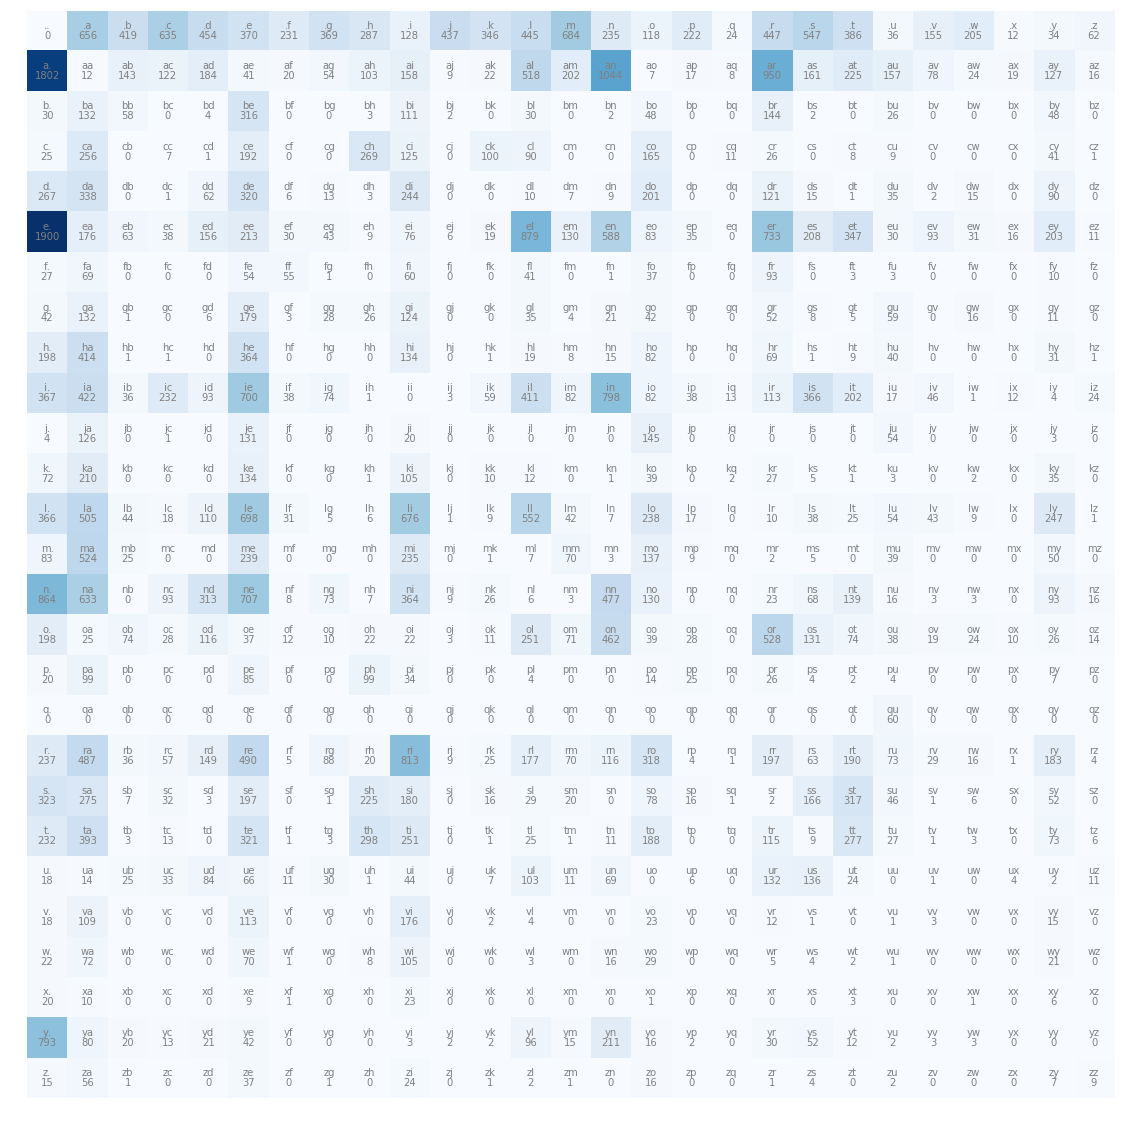

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range((len(itos))):
    for j in range(len(itos)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [22]:
Prob = (N+1).float() #P is floats of N  and adding a fake count of 1 to N.
Prob /= Prob.sum(1, keepdims=True) # P is prob distribution in every row

In [23]:
Prob

tensor([[1.2545e-04, 8.2424e-02, 5.2691e-02, 7.9789e-02, 5.7082e-02, 4.6544e-02,
         2.9106e-02, 4.6418e-02, 3.6131e-02, 1.6184e-02, 5.4949e-02, 4.3533e-02,
         5.5953e-02, 8.5937e-02, 2.9607e-02, 1.4929e-02, 2.7976e-02, 3.1364e-03,
         5.6204e-02, 6.8749e-02, 4.8551e-02, 4.6418e-03, 1.9571e-02, 2.5844e-02,
         1.6309e-03, 4.3909e-03, 7.9037e-03],
        [2.8848e-01, 2.0800e-03, 2.3040e-02, 1.9680e-02, 2.9600e-02, 6.7200e-03,
         3.3600e-03, 8.8000e-03, 1.6640e-02, 2.5440e-02, 1.6000e-03, 3.6800e-03,
         8.3040e-02, 3.2480e-02, 1.6720e-01, 1.2800e-03, 2.8800e-03, 1.4400e-03,
         1.5216e-01, 2.5920e-02, 3.6160e-02, 2.5280e-02, 1.2640e-02, 4.0000e-03,
         3.2000e-03, 2.0480e-02, 2.7200e-03],
        [3.1536e-02, 1.3530e-01, 6.0020e-02, 1.0173e-03, 5.0865e-03, 3.2248e-01,
         1.0173e-03, 1.0173e-03, 4.0692e-03, 1.1394e-01, 3.0519e-03, 1.0173e-03,
         3.1536e-02, 1.0173e-03, 3.0519e-03, 4.9847e-02, 1.0173e-03, 1.0173e-03,
         1.4751e-

In [27]:
for i in range(10):
  #sampling until end(.) character comes each time
  res = []
  ix = 0
  while True:
    p = Prob[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=False).item() #sampling
    res.append(itos[ix])
    if ix == 0:
      break
  print(''.join(res))

el.
kin.
diesttkor.
mellie.
pa.
sskicee.
mabliclanarer.
ffrie.
jucon.
ryqbaria.


In [26]:
#but this approch is difficult for bigger contexts

In [19]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [30]:
#eorror computaion
log_likelihood = 0.0
n = 0

for x in names:
#for w in ["andrejq"]:
  chs = ['.'] + list(x) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = Prob[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

#print(f'{log_likelihood=}')
nll = -log_likelihood
#print(f'{nll=}')
#print(f'{nll/n}')

KeyError: '-'

In [31]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in names[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. a
a a
a m
m i
i r
r .


In [32]:
xs

tensor([ 0,  1,  1, 13,  9, 18])

In [33]:
ys

tensor([ 1,  1, 13,  9, 18,  0])

In [34]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
xenc.shape

torch.Size([6, 27])

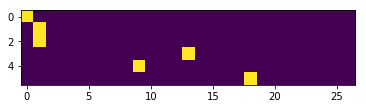

In [36]:
plt.imshow(xenc)

In [37]:
xenc.dtype

torch.float32

In [38]:
W = torch.randn((27, 1))
xenc @ W

tensor([[ 0.1421],
        [ 0.0995],
        [ 0.0995],
        [-1.4391],
        [-1.1672],
        [-0.3906]])

In [40]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [41]:
probs[0]

tensor([1.])

In [42]:
probs[0].shape

torch.Size([1])

In [43]:
probs[0].sum()

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [44]:
xs

tensor([ 0,  1,  1, 13,  9, 18])

In [45]:
ys

tensor([ 1,  1, 13,  9, 18,  0])

In [47]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [48]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [49]:
probs.shape

torch.Size([6, 27])

In [1]:

nlls = torch.zeros(6)
for i in range(6):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

NameError: name 'torch' is not defined

In [ ]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [ ]:
xs

In [ ]:
ys

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((56,56), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=56).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(6), ys].log().mean()

In [ ]:
print(loss.item())

In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [ ]:
W.data += -0.1 * W.grad

In [ ]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((56,56), generator=g, requires_grad=True)

In [ ]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=56).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=56).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))